# PROJECT HOSUING PRICE PREDICTION

# Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

# Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("train.csv")
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
test=pd.read_csv("test.csv")
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [4]:
print(train.shape)
print(test.shape)

(1168, 81)
(292, 80)


In [5]:
#checking null values
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
#getting idea of teh dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [8]:
#creating duplicates and dropping columns which have very less non null values
train_ds=train
test_ds=test
train.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace=True)
test.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace=True)

In [9]:
#making seperate lists of categorical and continuos varioables
categorical=[x for x in train.columns if train[x].dtype==object]
cont=[x for x in train.columns if x not in categorical]

In [10]:
for i in categorical:
    print(train[i].value_counts())
    print('--------------------')

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
--------------------
Pave    1164
Grvl       4
Name: Street, dtype: int64
--------------------
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
--------------------
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
--------------------
AllPub    1168
Name: Utilities, dtype: int64
--------------------
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
--------------------
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
--------------------
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV     

In [11]:
#getting correlation
corr=train.corr()
pd.set_option("display.max.rows",None)

In [12]:
#getting correlation with traget columns
corr['SalePrice']

Id              -0.023897
MSSubClass      -0.060775
LotFrontage      0.341294
LotArea          0.249499
OverallQual      0.789185
OverallCond     -0.065642
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.466386
BsmtFinSF1       0.362874
BsmtFinSF2      -0.010151
BsmtUnfSF        0.215724
TotalBsmtSF      0.595042
1stFlrSF         0.587642
2ndFlrSF         0.330386
LowQualFinSF    -0.032381
GrLivArea        0.707300
BsmtFullBath     0.212924
BsmtHalfBath    -0.011109
FullBath         0.554988
HalfBath         0.295592
BedroomAbvGr     0.158281
KitchenAbvGr    -0.132108
TotRmsAbvGrd     0.528363
Fireplaces       0.459611
GarageYrBlt      0.474346
GarageCars       0.628329
GarageArea       0.619000
WoodDeckSF       0.315444
OpenPorchSF      0.339500
EnclosedPorch   -0.115004
3SsnPorch        0.060119
ScreenPorch      0.100284
PoolArea         0.103280
MiscVal         -0.013071
MoSold           0.072764
YrSold          -0.045508
SalePrice        1.000000
Name: SalePr

In [13]:
#dropping the columns that are least related with the target
train.drop(['Id','MSSubClass','Street','LandContour','Utilities','LotConfig','LandSlope','BldgType','OverallCond','MasVnrType','BsmtFinType1','BsmtFinType2','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','FireplaceQu','Fence','MoSold','YrSold','SaleType','Condition2','Exterior2nd','BsmtCond','GarageQual','3SsnPorch','MiscVal'],axis=1,inplace=True)
test.drop(['Id','MSSubClass','Street','LandContour','Utilities','LotConfig','LandSlope','BldgType','OverallCond','MasVnrType','BsmtFinType1','BsmtFinType2','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','FireplaceQu','Fence','MoSold','YrSold','SaleType','Condition2','Exterior2nd','BsmtCond','GarageQual','3SsnPorch','MiscVal'],axis=1,inplace=True)

In [14]:
#checking shape after drop columns
train.shape

(1168, 52)

In [15]:
test.shape

(292, 51)

In [16]:
train.corr()['SalePrice']

LotFrontage      0.341294
LotArea          0.249499
OverallQual      0.789185
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.466386
BsmtFinSF1       0.362874
BsmtUnfSF        0.215724
TotalBsmtSF      0.595042
1stFlrSF         0.587642
2ndFlrSF         0.330386
GrLivArea        0.707300
BsmtFullBath     0.212924
FullBath         0.554988
HalfBath         0.295592
BedroomAbvGr     0.158281
KitchenAbvGr    -0.132108
TotRmsAbvGrd     0.528363
Fireplaces       0.459611
GarageYrBlt      0.474346
GarageCars       0.628329
GarageArea       0.619000
WoodDeckSF       0.315444
OpenPorchSF      0.339500
EnclosedPorch   -0.115004
ScreenPorch      0.100284
PoolArea         0.103280
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [17]:
train.corr()

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
LotFrontage       1.000000  0.557257     0.247809   0.118554      0.096050   
LotArea           0.557257  1.000000     0.107188   0.005506      0.027228   
OverallQual       0.247809  0.107188     1.000000   0.575800      0.555945   
YearBuilt         0.118554  0.005506     0.575800   1.000000      0.592829   
YearRemodAdd      0.096050  0.027228     0.555945   0.592829      1.000000   
MasVnrArea        0.202225  0.121448     0.409163   0.323006      0.181869   
BsmtFinSF1        0.247780  0.221851     0.219643   0.227933      0.114430   
BsmtUnfSF         0.123943  0.006600     0.308676   0.155559      0.174732   
TotalBsmtSF       0.386261  0.259733     0.528285   0.386265      0.280720   
1stFlrSF          0.448186  0.312843     0.458758   0.279450      0.233384   
2ndFlrSF          0.099250  0.059803     0.316624   0.011834      0.155102   
GrLivArea         0.410414  0.281360     0.599700   0.198644      0.295048   
BsmtFullBath      0.104255  0.142387     0.101732   0.164983      0.104643   
FullBath          0.189321  0.123197     0.548824   0.471264      0.444446   
HalfBath          0.053168  0.007271     0.296134   0.243227      0.194943   
BedroomAbvGr      0.264010  0.117351     0.099639  -0.080639     -0.035847   
KitchenAbvGr     -0.002890 -0.013075    -0.178220  -0.167869     -0.139943   
TotRmsAbvGrd      0.351969  0.184546     0.432579   0.095476      0.206923   
Fireplaces        0.262076  0.285983     0.390067   0.134313      0.118378   
GarageYrBlt       0.061101 -0.034981     0.541719   0.826366      0.639153   
GarageCars        0.276798  0.158313     0.596322   0.525346      0.428325   
GarageArea        0.344908  0.195162     0.566782   0.473216      0.387744   
WoodDeckSF        0.101751  0.216720     0.227137   0.204830      0.197410   
OpenPorchSF       0.167092  0.093080     0.341030   0.191069      0.238755   
EnclosedPorch     0.023118 -0.007446    -0.098374  -0.373544     -0.193574   
ScreenPorch       0.033111  0.025256     0.059387  -0.058760     -0.046220   
PoolArea          0.223429  0.097107     0.072247   0.006408      0.006874   
SalePrice         0.341294  0.249499     0.789185   0.514408      0.507831   

               MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  \
LotFrontage      0.202225    0.247780   0.123943     0.386261  0.448186  ...   
LotArea          0.121448    0.221851   0.006600     0.259733  0.312843  ...   
OverallQual      0.409163    0.219643   0.308676     0.528285  0.458758  ...   
YearBuilt        0.323006    0.227933   0.155559     0.386265  0.279450  ...   
YearRemodAdd     0.181869    0.114430   0.174732     0.280720  0.233384  ...   
MasVnrArea       1.000000    0.267066   0.109850     0.366833  0.339938  ...   
BsmtFinSF1       0.267066    1.000000  -0.499861     0.518940  0.445876  ...   
BsmtUnfSF        0.109850   -0.499861   1.000000     0.414186  0.307437  ...   
TotalBsmtSF      0.366833    0.518940   0.414186     1.000000  0.813357  ...   
1stFlrSF         0.339938    0.445876   0.307437     0.813357  1.000000  ...   
2ndFlrSF         0.173358   -0.127656   0.002736    -0.164795 -0.205683  ...   
GrLivArea        0.387891    0.217160   0.232920     0.461067  0.566049  ...   
BsmtFullBath     0.086720    0.645126  -0.431740     0.296654  0.238026  ...   
FullBath         0.268545    0.054511   0.272193     0.311120  0.374354  ...   
HalfBath         0.200926    0.015767  -0.044025    -0.037014 -0.122019  ...   
BedroomAbvGr     0.091717   -0.114888   0.156056     0.036237  0.106293  ...   
KitchenAbvGr    -0.038281   -0.065450   0.015532    -0.065410  0.084392  ...   
TotRmsAbvGrd     0.279391    0.043499   0.237043     0.273895  0.399177  ...   
Fireplaces       0.243812    0.257482   0.040509     0.328241  0.406537  ...   
GarageYrBlt      0.254547    0.135558   0.192237     0.313928  0.219750  ...   
GarageCars       0.342553    0.197529   0.221097     0.423592  0.414905 

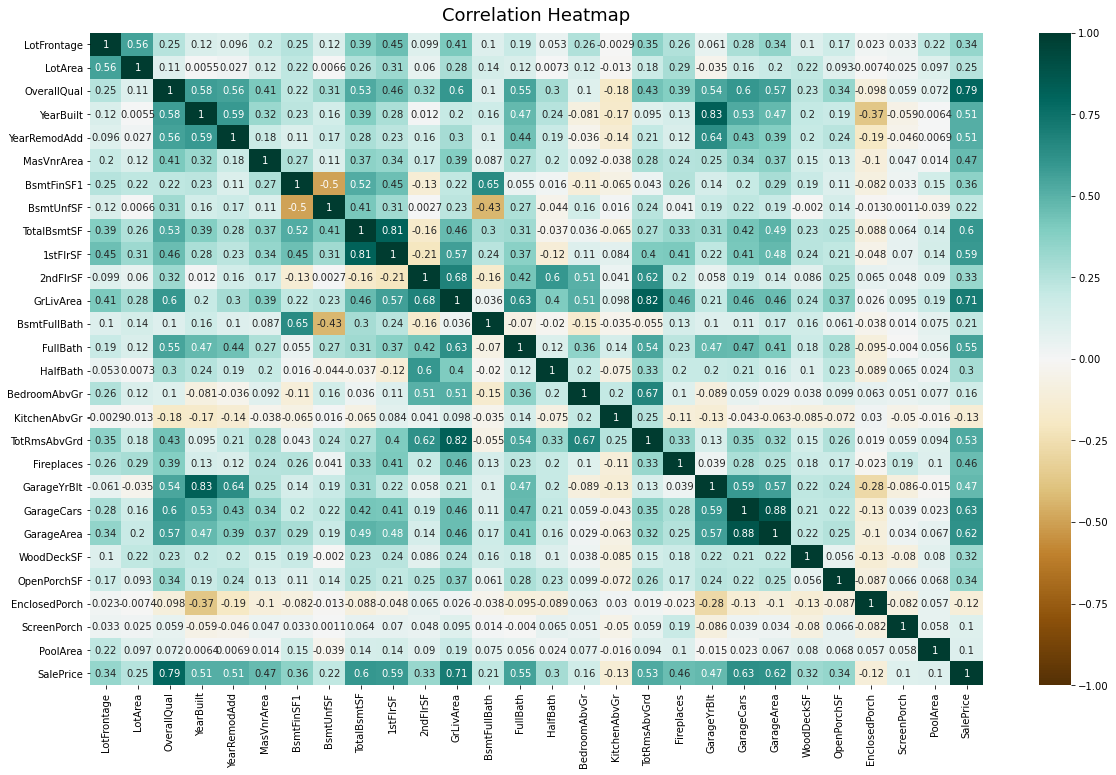

In [18]:
plt.figure(figsize=(20,12))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [19]:
train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [20]:
#creating new categorical and cont variable list and label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
categorical=[x for x in train.columns if train[x].dtype==object]
cont=[x for x in train.columns if x not in categorical]
le=LabelEncoder()
for i in categorical:
    train[i].fillna(train[i].mode()[0],inplace=True)
    test[i].fillna(test[i].mode()[0],inplace=True)
for i in categorical:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

# univariate analysis

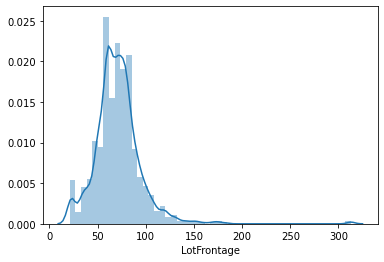

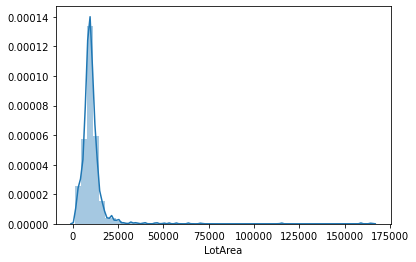

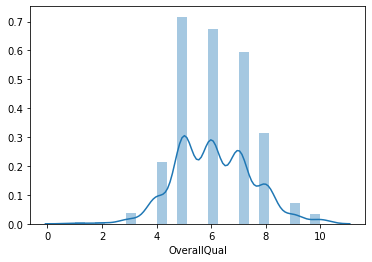

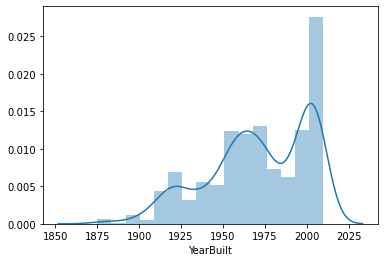

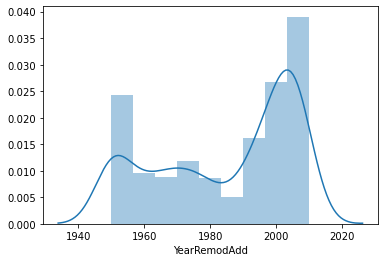

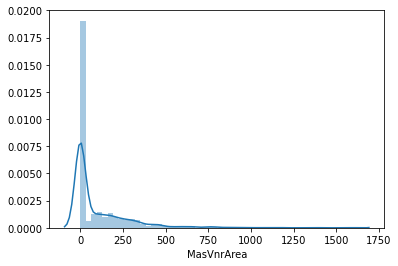

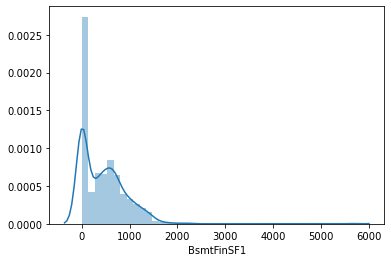

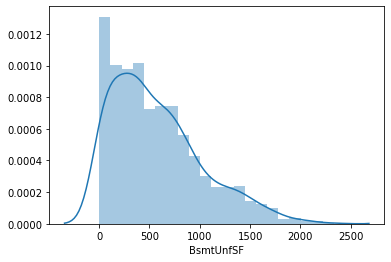

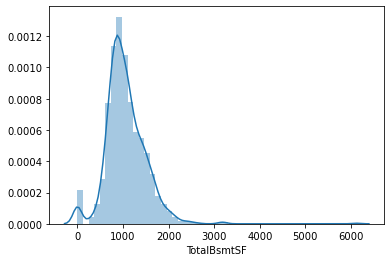

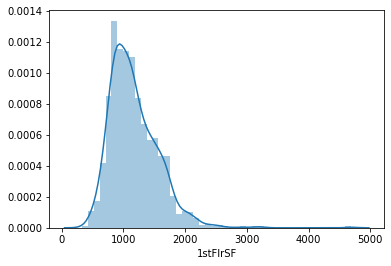

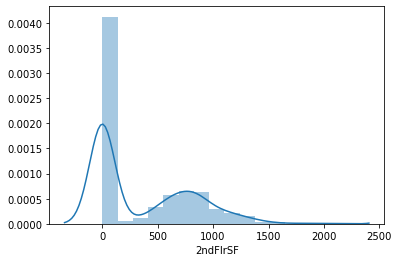

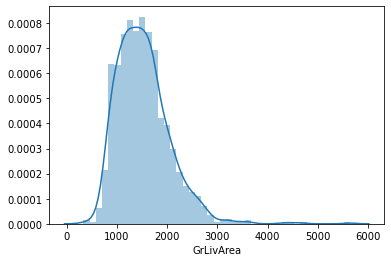

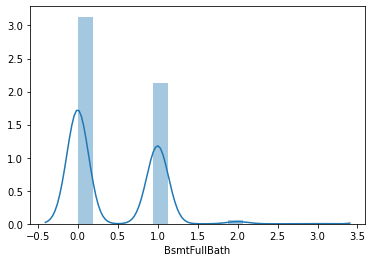

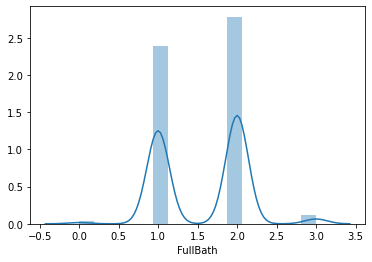

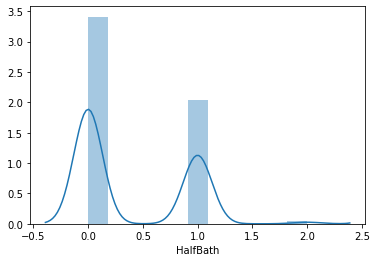

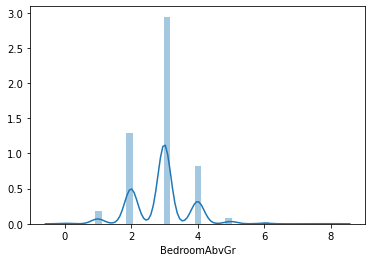

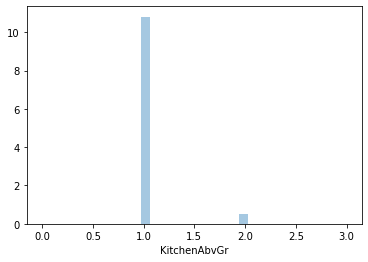

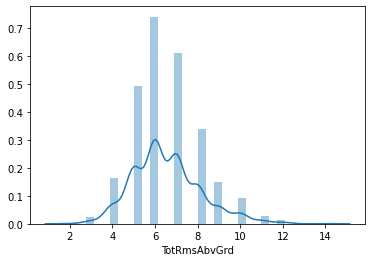

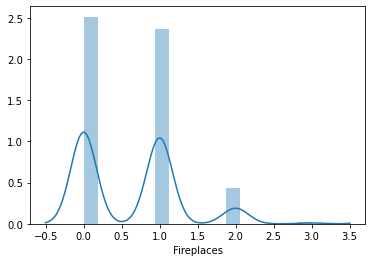

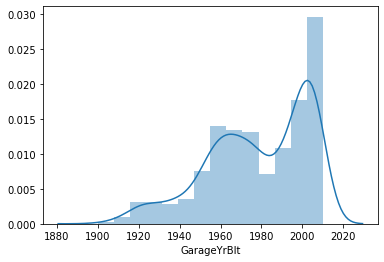

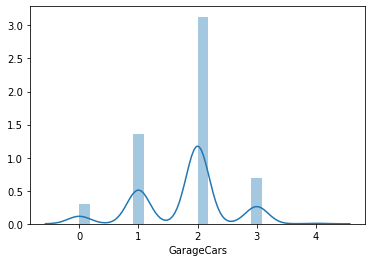

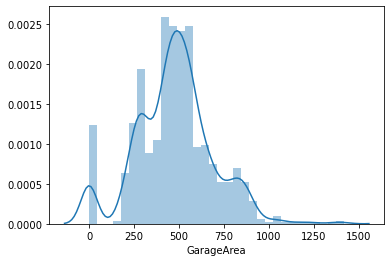

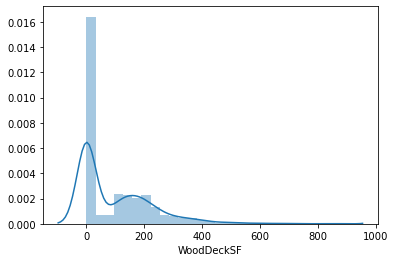

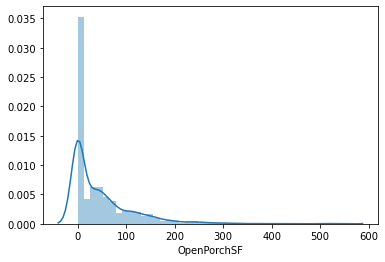

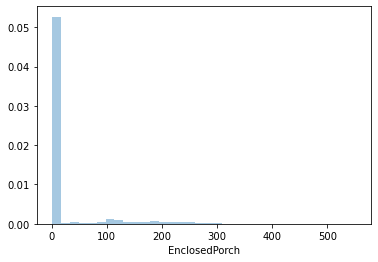

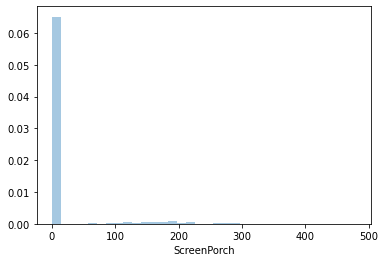

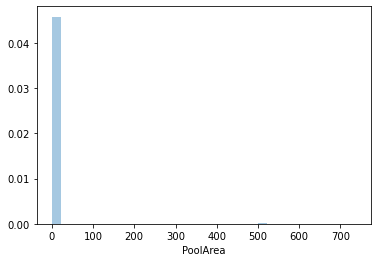

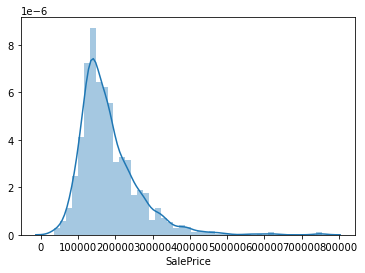

In [21]:
#getting distribution data in continuous columns
for i in cont:
    sns.distplot(train[i])
    plt.show()

most of teh columns including target are skewed appropriate methods to be used to treat skewness

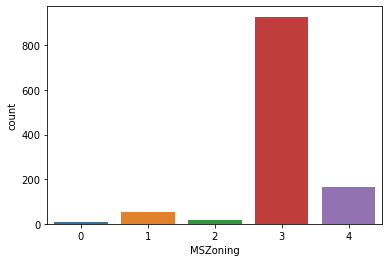

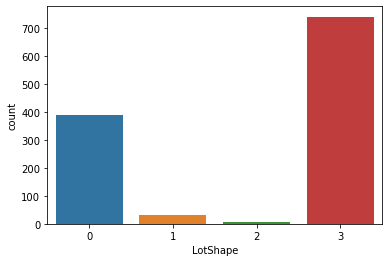

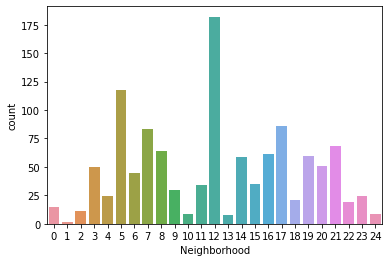

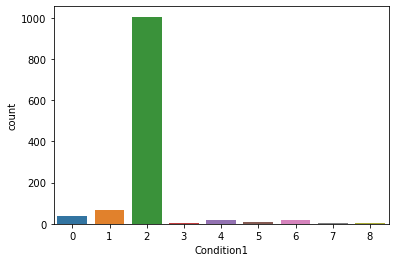

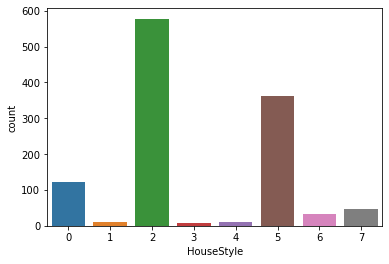

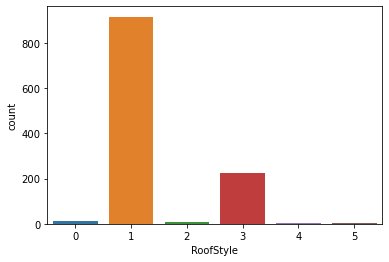

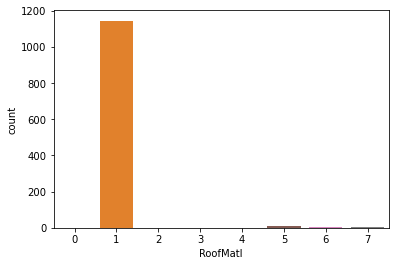

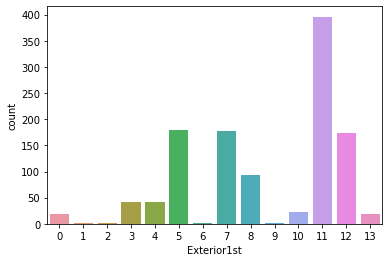

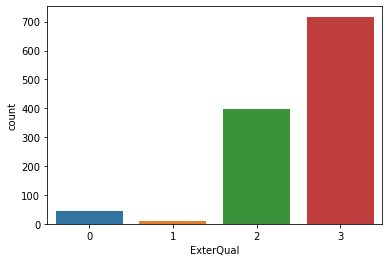

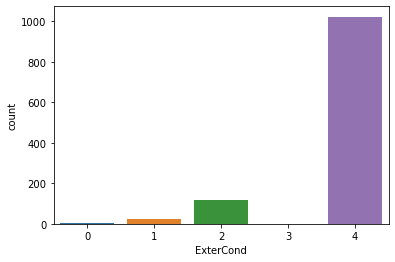

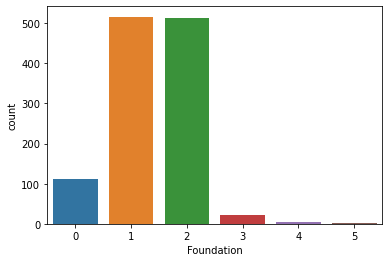

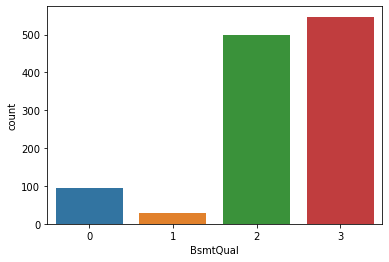

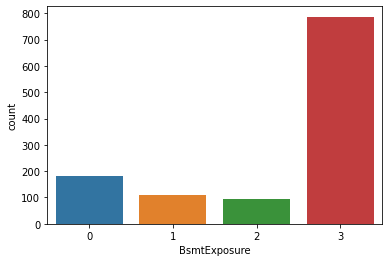

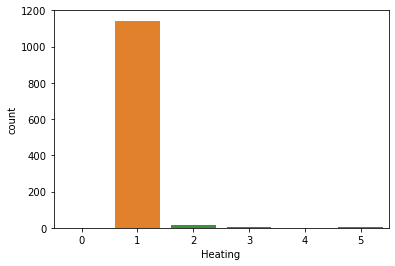

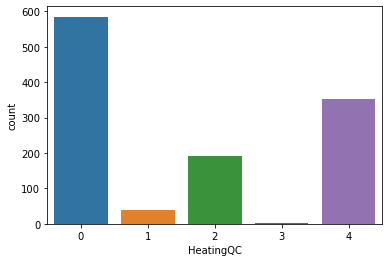

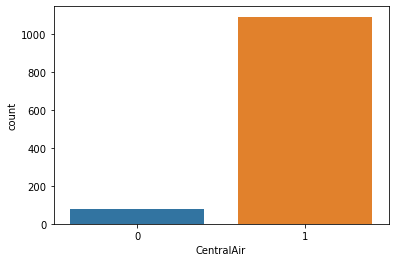

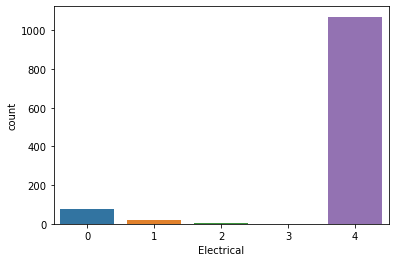

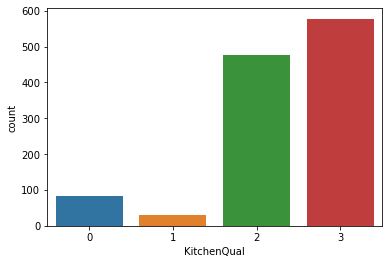

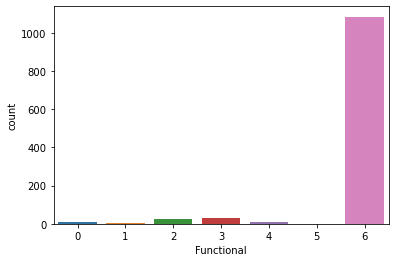

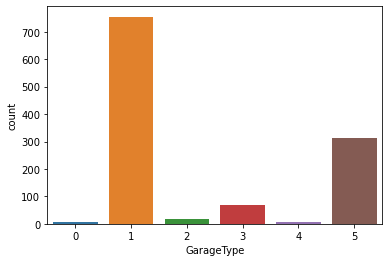

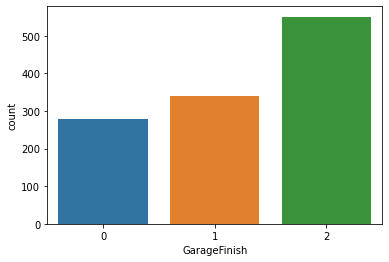

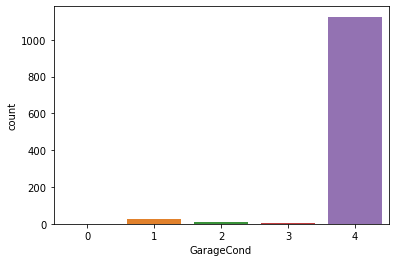

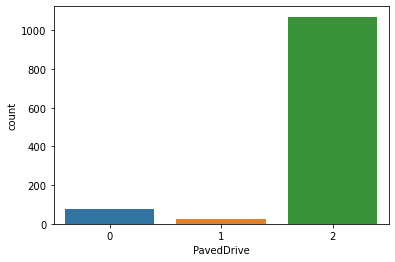

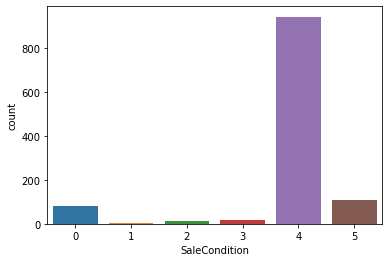

In [22]:
#visualizing each categorical column wrt count of each value
for i in categorical:
    sns.countplot(train[i])
    plt.show()

observing the categorical columns we can see that the columns are imbalanced, hence randomization is employed

# bivariate analysis

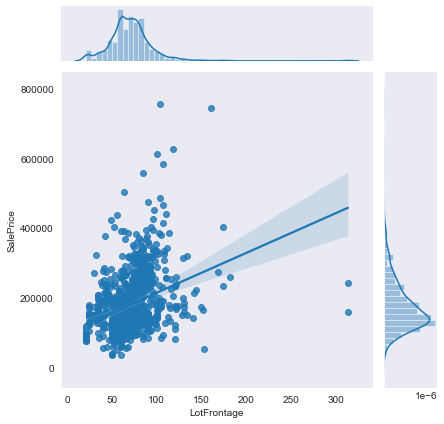

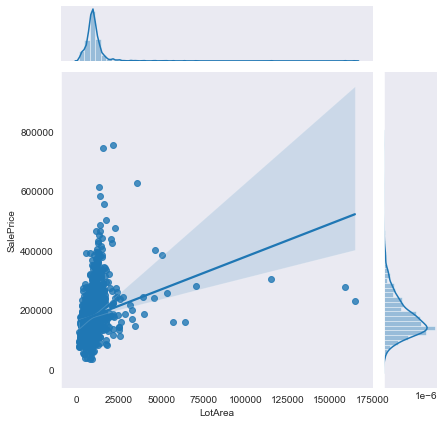

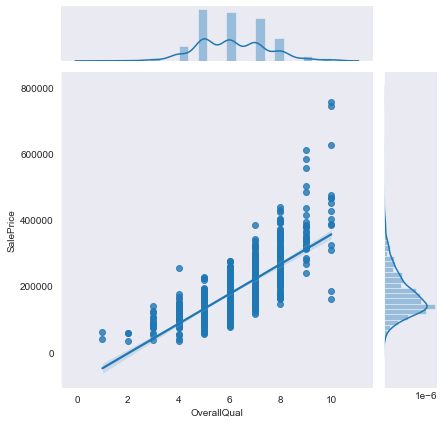

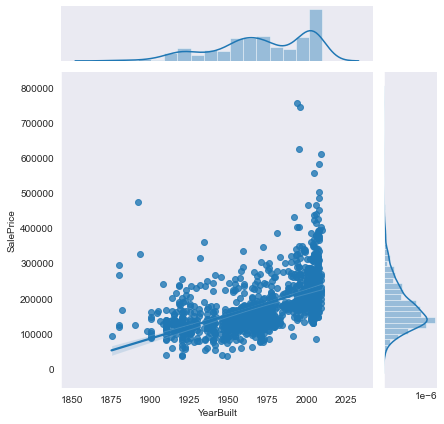

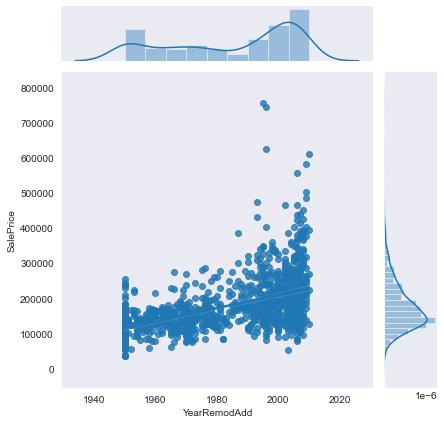

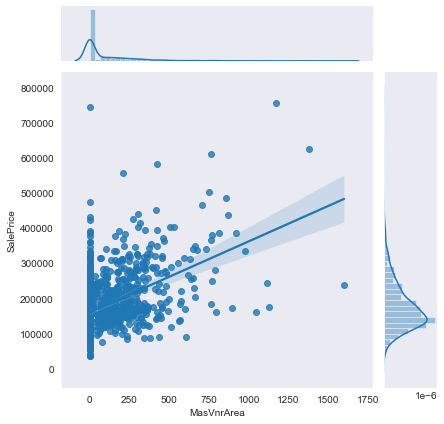

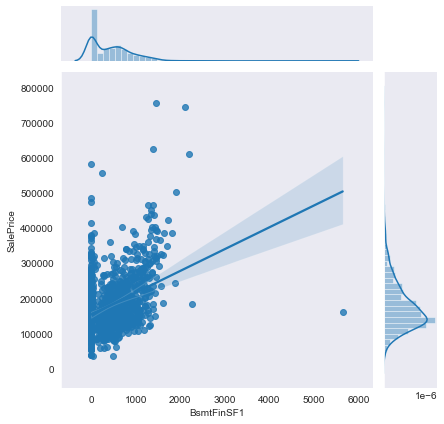

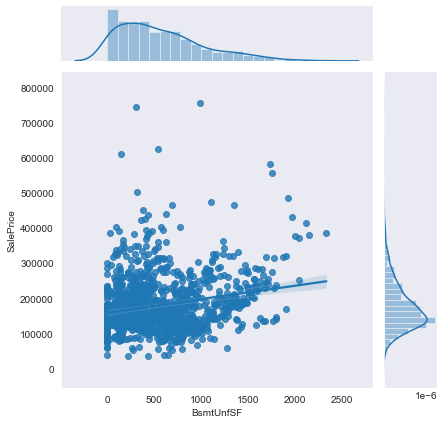

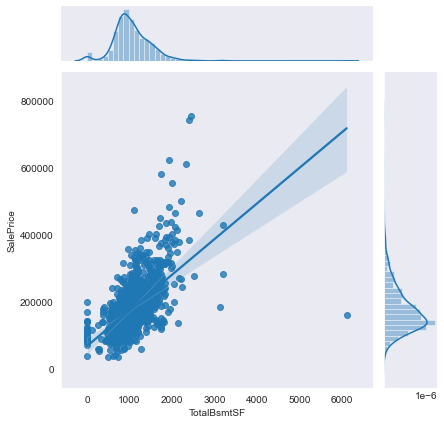

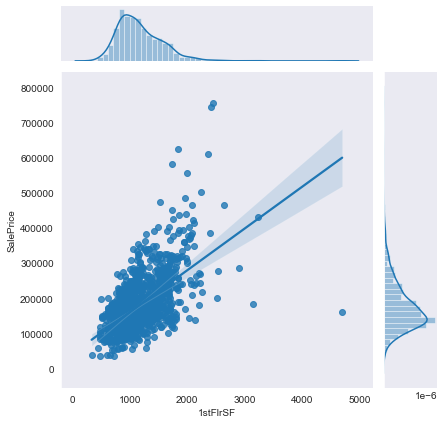

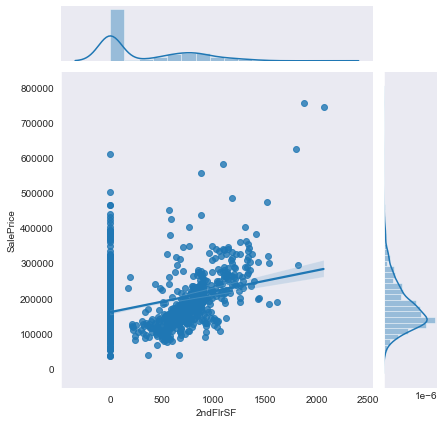

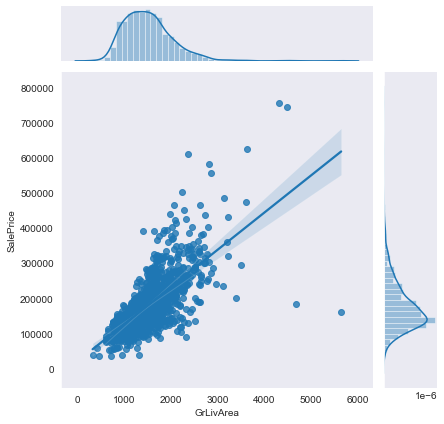

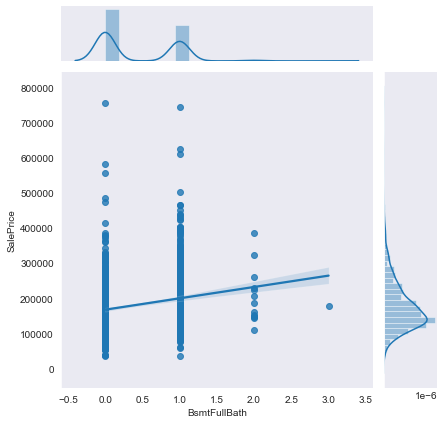

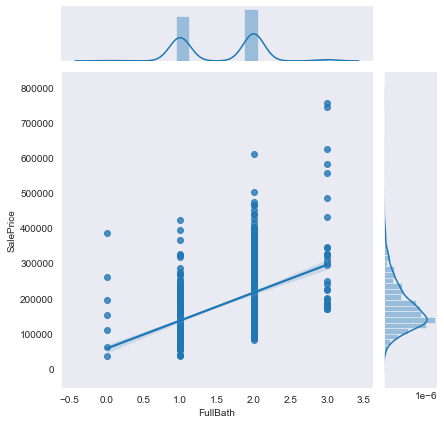

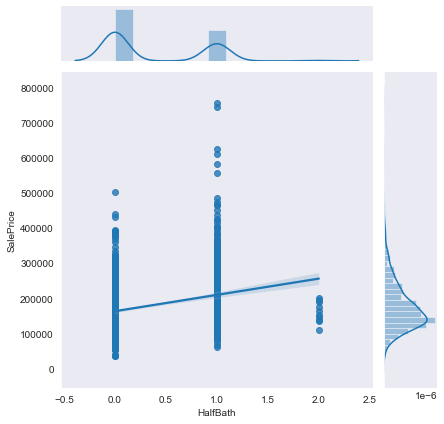

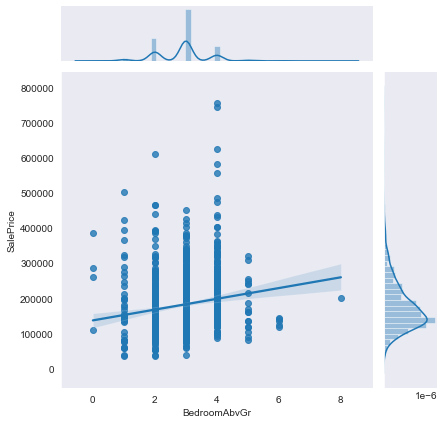

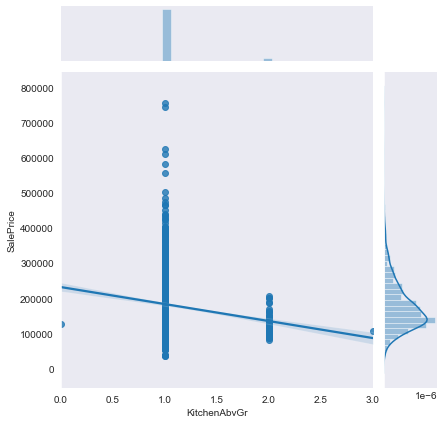

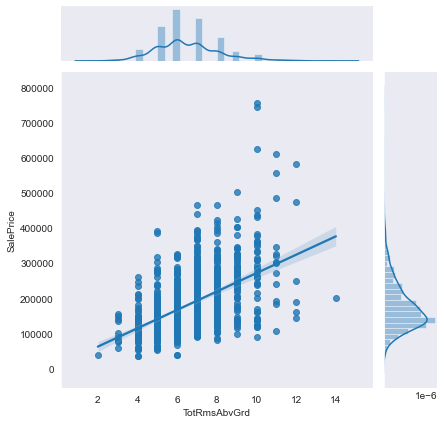

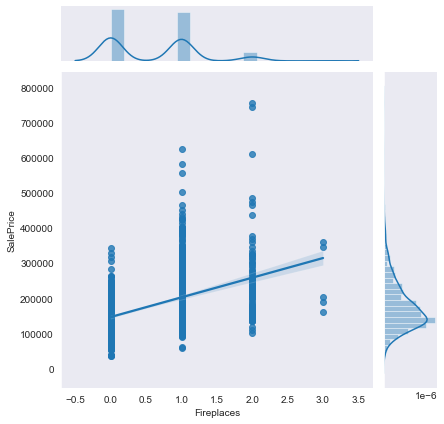

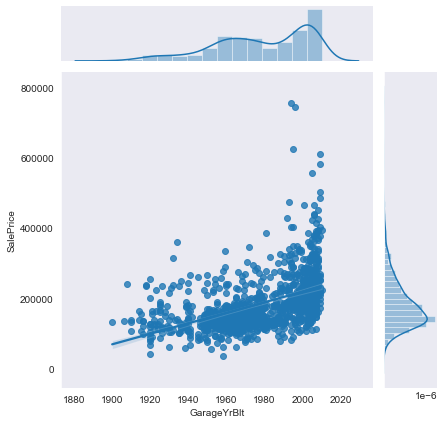

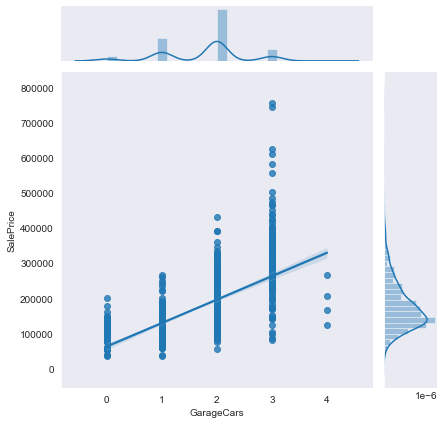

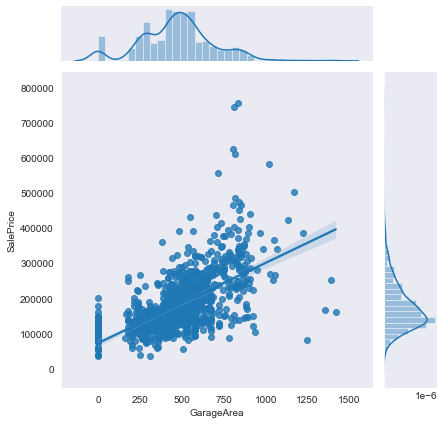

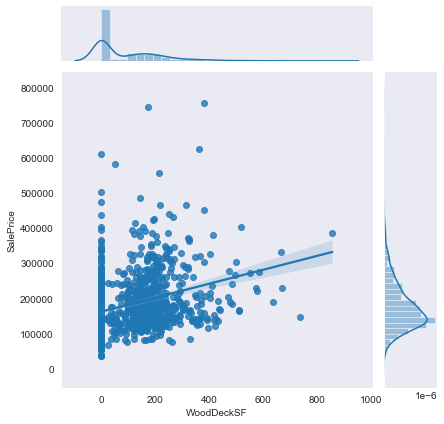

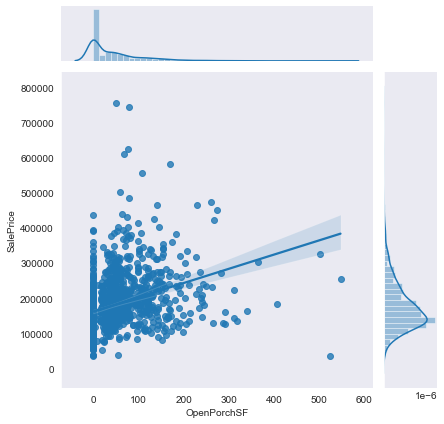

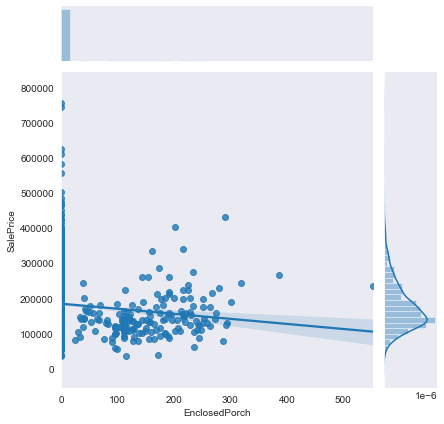

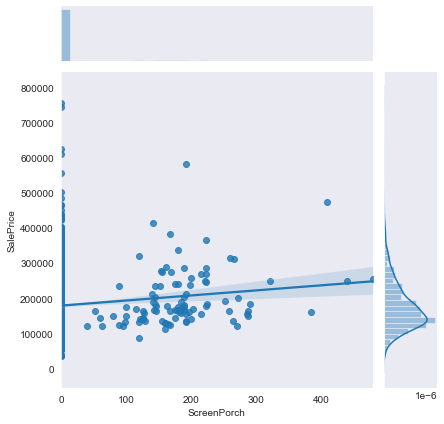

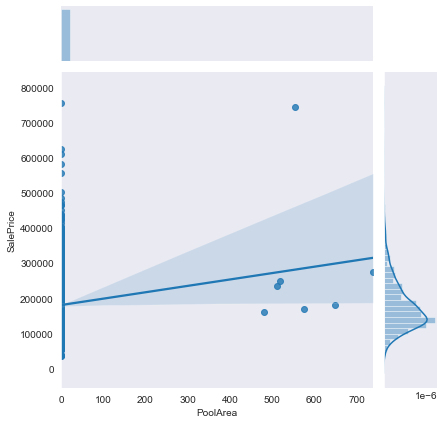

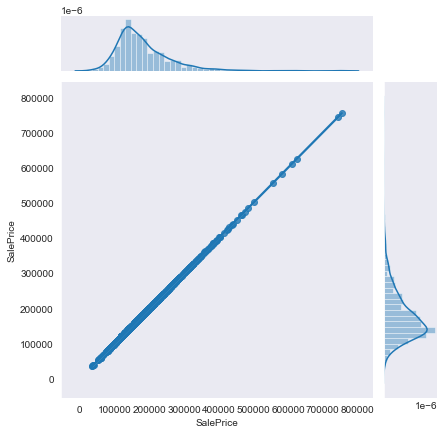

In [23]:
for i in cont:
    #sns.set_theme()
    sns.set_style('dark')
    sns.jointplot(y=train['SalePrice'],x=train[i],data=train,kind='reg')
    plt.show()

In [24]:
print(train['SalePrice'].skew())
print(train['SalePrice'].kurt())

1.953877705368286
7.390656691648756


# normalization

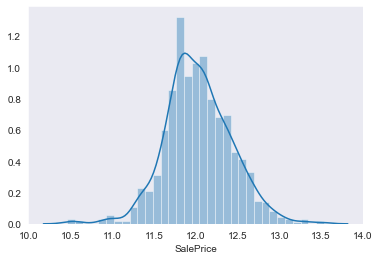

In [25]:
target_transform = np.log1p(train['SalePrice'])
sns.distplot(target_transform)

In [26]:
for i in cont:
    print(train[i].skew())

2.4502410142609246
10.659284548299626
0.1750824992845271
-0.5792035025736898
-0.49586353822203716
2.8261726776978673
1.8716059327957582
0.9090571206651619
1.7445908855423957
1.5137072331415693
0.8234785103609108
1.4499515426476701
0.6271059162466773
0.05780870861471475
0.6564917514090118
0.2438552945621391
4.365258908133523
0.6446565826319272
0.6719656450265
-0.6445640197769343
-0.3585558146314816
0.18966497539008143
1.504929246192858
2.41083972347696
3.0436098308918846
4.105740751686475
13.243710763499866
1.953877705368286


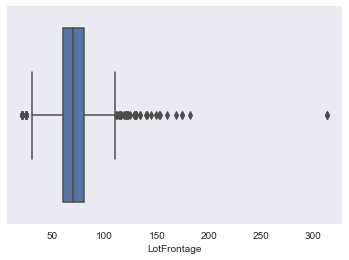

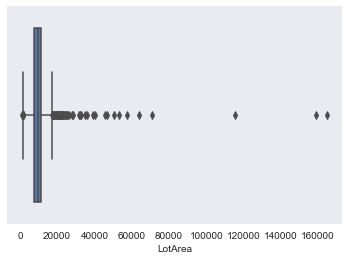

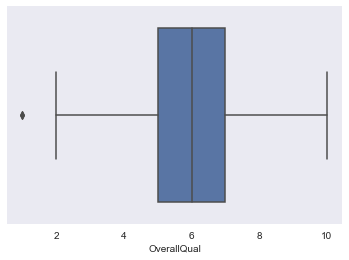

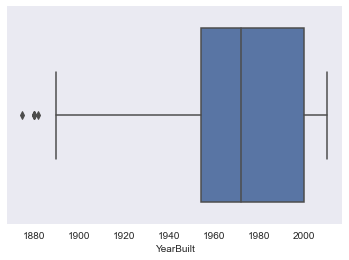

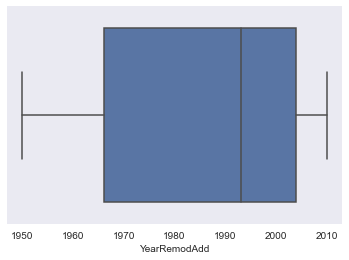

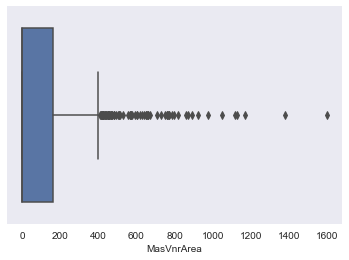

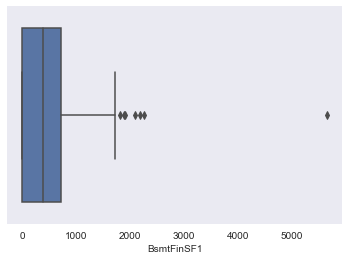

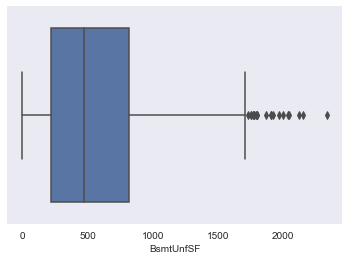

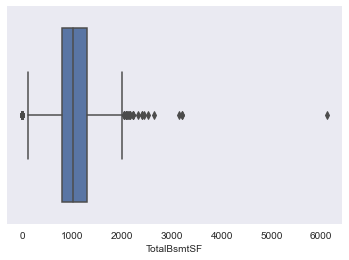

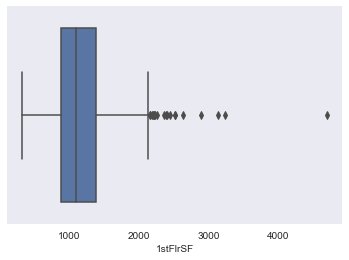

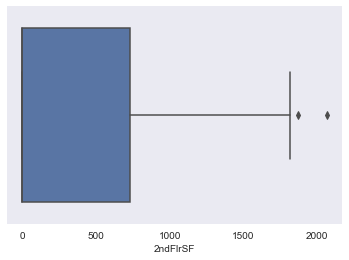

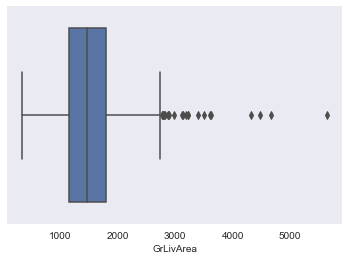

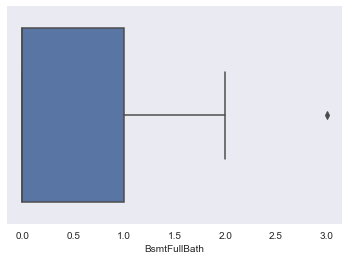

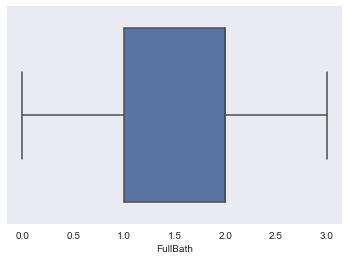

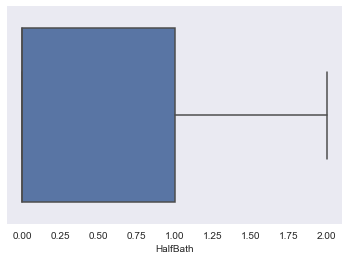

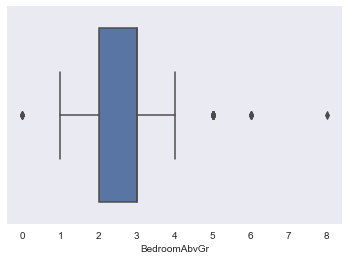

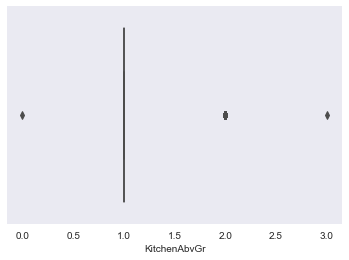

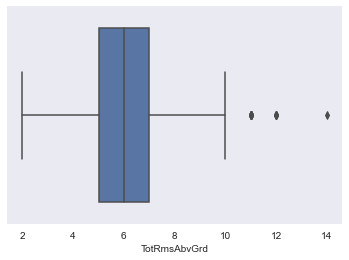

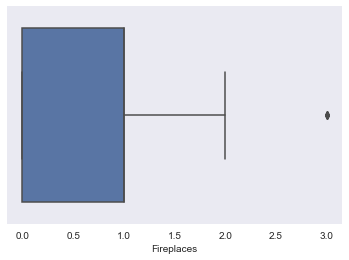

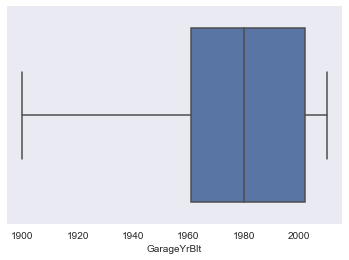

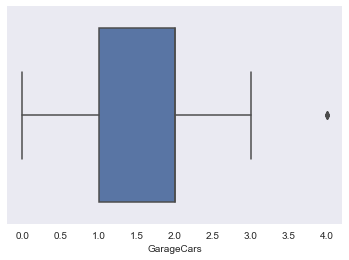

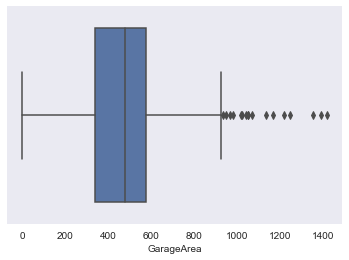

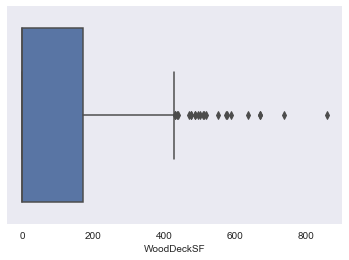

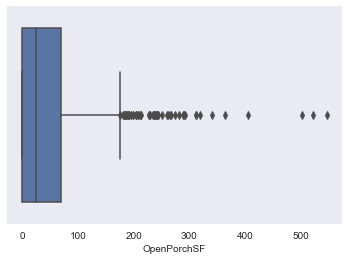

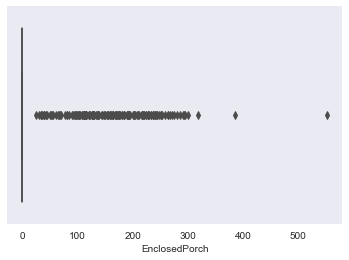

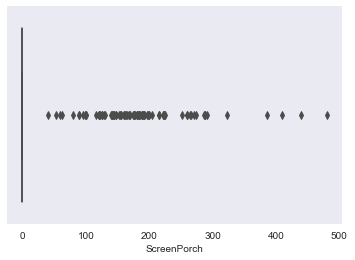

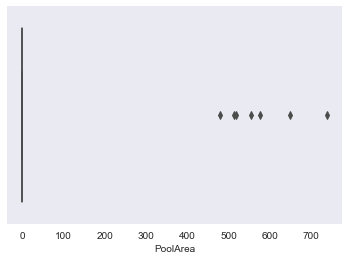

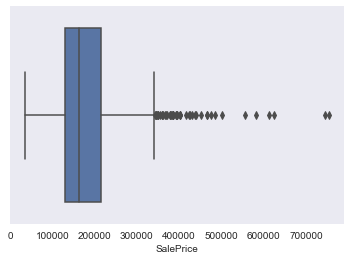

In [27]:
for i in cont:
    sns.boxplot(train[i],palette='deep')
    sns.despine(left=True)
    plt.show()
    

In [28]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())

In [29]:
cont

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice']

In [30]:
transform_train=pd.DataFrame({})
for i in cont:
    transform_train[i]=np.log1p(train[i])
transform_test=pd.DataFrame({})
for i in ['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea']:
    transform_test[i]=np.log1p(test[i])
for i in categorical:
    transform_train[i]=train[i]
print(transform_train.shape)
for i in categorical:
    transform_test[i]=test[i]
print(transform_test.shape)

(1168, 52)
(292, 51)


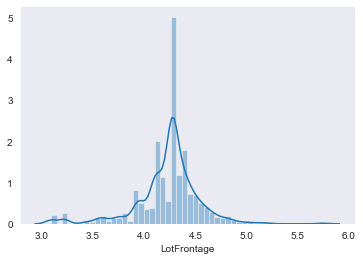

-0.8156648061917143


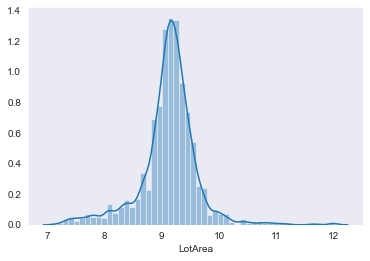

-0.16910699538994817


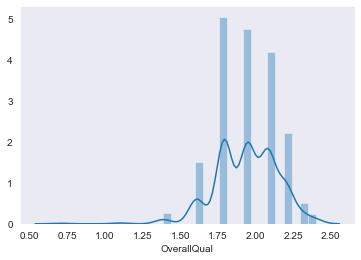

-0.68799194734455


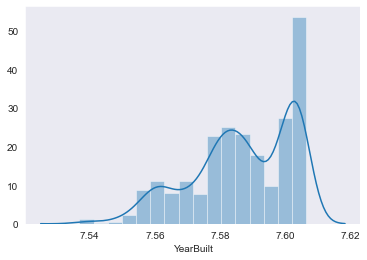

-0.6062449761958256


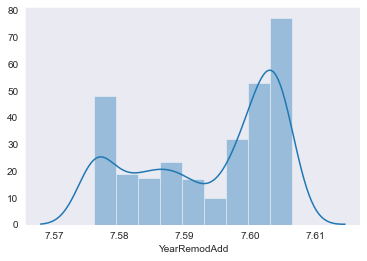

-0.5031681318196755


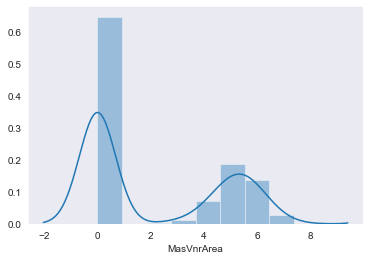

0.5090307625982139


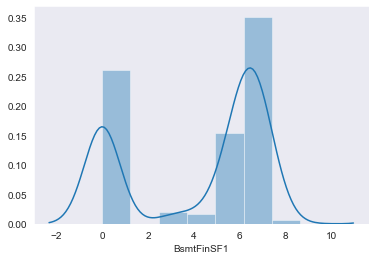

-0.606858648705479


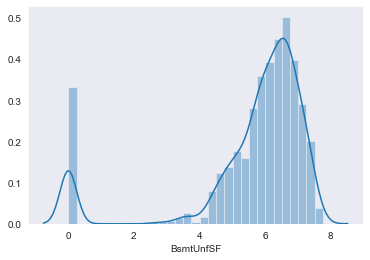

-2.1298824031472363


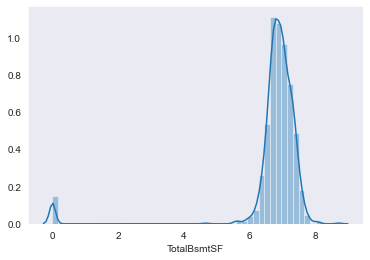

-5.1465737669947345


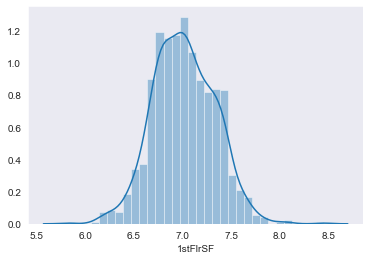

0.10579515253771477


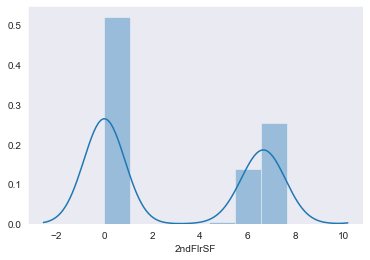

0.2893352437910369


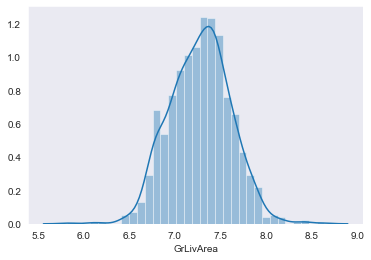

0.0014483429235394262


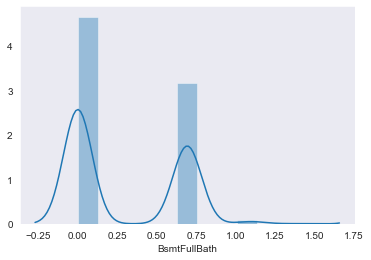

0.43079116889007907


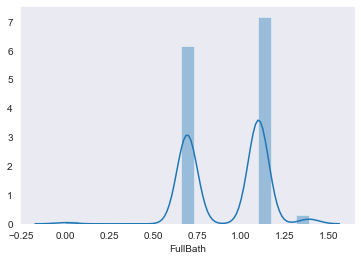

-0.36919884247014695


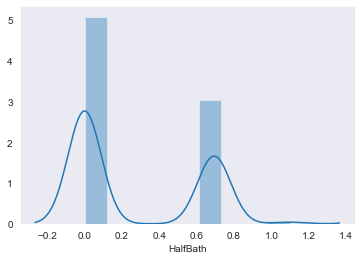

0.5436807632692655


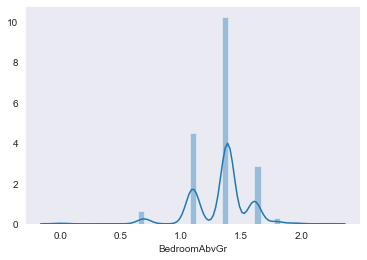

-1.1533970984807416


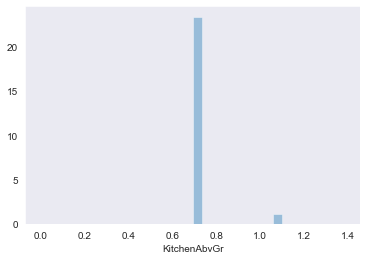

3.6783937366318606


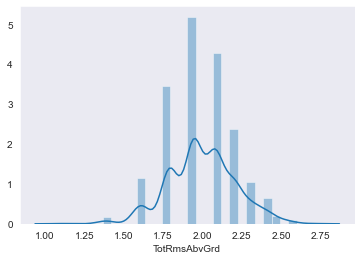

-0.07192563969766726


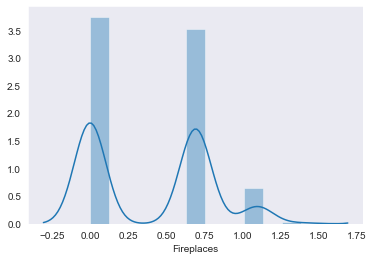

0.18827975791516569


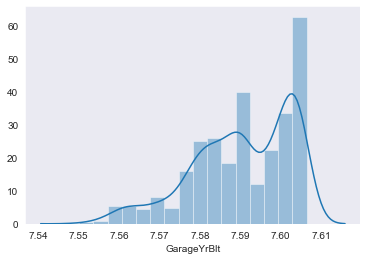

-0.6868605108067307


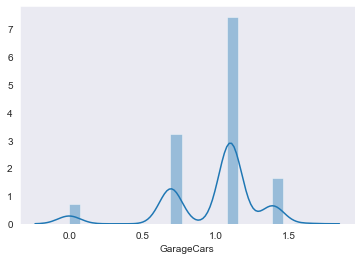

-1.3934289016135033


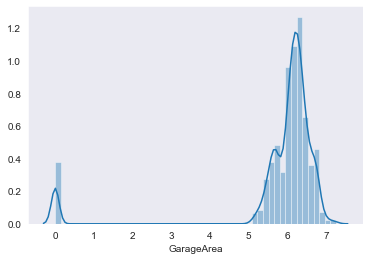

-3.508378831165335


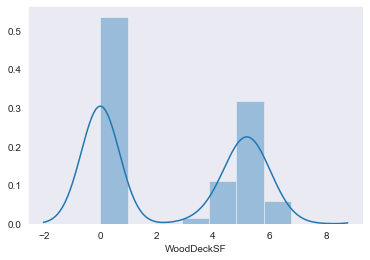

0.1310751936177036


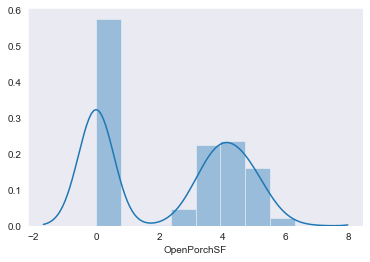

-0.004278508102839663


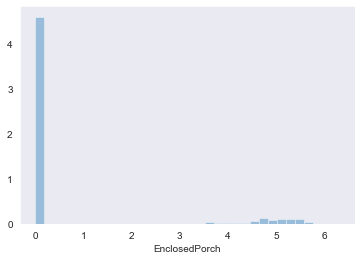

2.0796099192432433


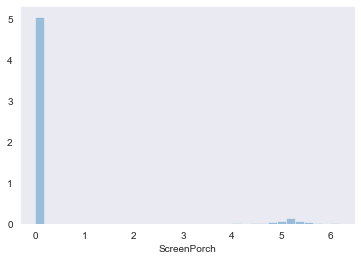

3.1046648935102006


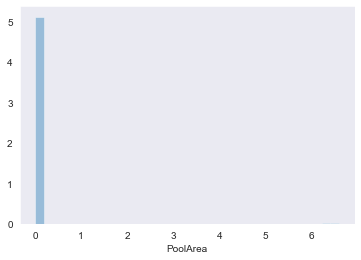

12.826712665868666


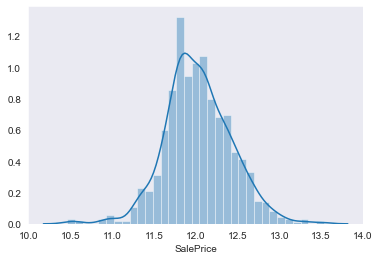

0.07360997199445295


In [31]:
for i in cont:
    sns.distplot(transform_train[i])
    plt.show()
    print(transform_train[i].skew())

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(transform_train))
z

array([[0.14626083, 1.21764042, 0.02557883, ..., 0.1871929 , 0.291828  ,
        0.20793187],
       [1.07739088, 1.09744261, 1.2557247 , ..., 0.1871929 , 0.291828  ,
        0.20793187],
       [0.97468821, 0.16763133, 0.67919467, ..., 0.1871929 , 0.291828  ,
        0.20793187],
       ...,
       [3.27502729, 2.7435243 , 0.02557883, ..., 0.1871929 , 0.291828  ,
        0.20793187],
       [0.96873266, 0.13826922, 1.62140155, ..., 5.77575174, 3.69478135,
        0.20793187],
       [0.14626083, 0.29301727, 0.02557883, ..., 0.1871929 , 0.291828  ,
        0.20793187]])

In [33]:
transform_train.describe()

LotFrontage      LotArea  OverallQual    YearBuilt  YearRemodAdd  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean      4.231292     9.117761     1.940684     7.586651      7.593701   
std       0.309265     0.505184     0.204384     0.015358      0.010495   
min       3.091042     7.170888     0.693147     7.536897      7.576097   
25%       4.110874     8.938858     1.791759     7.578145      7.584265   
50%       4.276506     9.161518     1.945910     7.587311      7.597898   
75%       4.385132     9.351536     2.079442     7.601402      7.603399   
max       5.749393    12.011644     2.397895     7.606387      7.606387   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1161.000000  1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean      2.110603     4.218684     5.630350     6.752934     7.014755  ...   
std       2.622662     2.997574     1.880368     1.152013     0.316539  ...   
min       0.000000     0.000000     0.000000     0.000000     5.814131  ...   
25%       0.000000     0.000000     5.379897     6.684612     6.794587  ...   
50%       0.000000     5.957131     6.163315     6.914234     7.000790  ...   
75%       5.081404     6.572981     6.705639     7.164333     7.239215  ...   
max       7.378384     8.638525     7.756623     8.717846     8.453827  ...   

         HeatingQC   CentralAir   Electrical  KitchenQual   Functional  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.569349     0.933219     3.688356     2.328767     5.742295   
std       1.749129     0.249749     1.042606     0.832992     0.987250   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     4.000000     2.000000     6.000000   
50%       0.000000     1.000000     4.000000     2.000000     6.000000   
75%       4.000000     1.000000     4.000000     3.000000     6.000000   
max       4.000000     1.000000     4.000000     3.000000     6.000000   

        GarageType  GarageFinish   GarageCond   PavedDrive  SaleCondition  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      2.225171      1.233733     3.905822     1.853596       3.768836  
std       1.767017      0.809747     0.503323     0.501894       1.112208  
min       0.000000      0.000000     0.000000     0.000000       0.000000  
25%       1.000000      1.000000     4.000000     2.000000       4.000000  
50%       1.000000      1.000000     4.000000     2.000000       4.000000  
75%       5.000000      2.000000     4.000000     2.000000       4.000000  
max       5.000000      2.000000     4.000000     2.000000       5.000000  

[8 rows x 52 columns]

the difference between 3rd quantile and max is not much in any of the columns except EnclosedPorch,ScreenPorch,PoolArea this indicates less to none outliers in data still there is a comparatively more diff between 25%-50% and 50%-75% which indicates data skewness and hence must be treated

In [34]:
#dropping these as maximum values are 0
transform_train.drop(['EnclosedPorch','ScreenPorch','PoolArea'],axis=1,inplace=True)
transform_test.drop(['EnclosedPorch','ScreenPorch','PoolArea'],axis=1,inplace=True)

In [35]:
q1 = train.quantile(0.25)
q3 = train.quantile(0.75)
IQR = q3-q1
IQR

MSZoning             0.00
LotFrontage         19.25
LotArea           3894.00
LotShape             3.00
Neighborhood        10.00
Condition1           0.00
HouseStyle           3.00
OverallQual          2.00
YearBuilt           46.00
YearRemodAdd        38.00
RoofStyle            0.00
RoofMatl             0.00
Exterior1st          4.00
MasVnrArea         160.00
ExterQual            1.00
ExterCond            0.00
Foundation           1.00
BsmtQual             1.00
BsmtExposure         1.00
BsmtFinSF1         714.50
BsmtUnfSF          600.00
TotalBsmtSF        492.50
Heating              0.00
HeatingQC            4.00
CentralAir           0.00
Electrical           0.00
1stFlrSF           500.00
2ndFlrSF           729.00
GrLivArea          651.75
BsmtFullBath         1.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
KitchenQual          1.00
TotRmsAbvGrd         2.00
Functional           0.00
Fireplaces           1.00
GarageType  

In [36]:
transform_train.shape

(1168, 49)

In [37]:
transform_test.shape

(292, 48)

# testing different models by splitting train data first

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [39]:
transform_train.dropna(inplace=True)
transform_test.dropna(inplace=True)

In [40]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
ds_tran=pt.fit_transform(transform_train)
train_ds=pd.DataFrame(ds_tran)
ds_tran=pt.fit_transform(transform_test)
test_ds=pd.DataFrame(ds_tran)

In [41]:
x=transform_train.loc[:, transform_train.columns != 'SalePrice']
y=transform_train['SalePrice']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20,random_state=43)

In [43]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
r2_score(y_test,pred)

0.8234310187661582

In [44]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,x,y,cv=5, scoring='r2').mean())
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,pred))
print(mean_squared_error(y_test,pred,squared=False))

0.8595361877045031
0.02880190168165447
0.1697112302755904


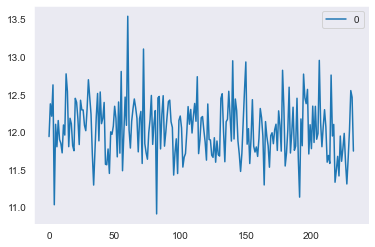

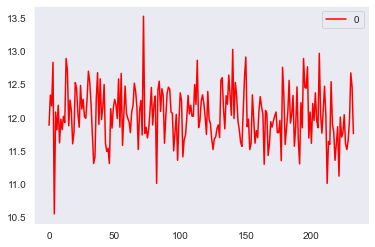

In [45]:
(pd.DataFrame(pred)).plot(kind='line')
pd.DataFrame(y_test.to_numpy()).plot(kind='line',color='red')

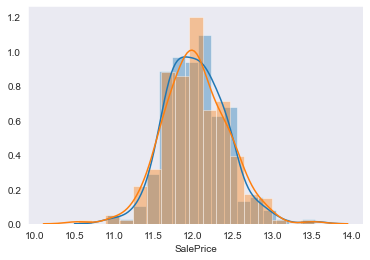

In [46]:
sns.distplot(pred)
sns.distplot(y_test)

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
r2_score(y_test,pred_rfr)

0.8323940613629668

In [48]:
print(cross_val_score(rfr,x,y,cv=5, scoring='r2').mean())
print(mean_squared_error(y_test,pred_rfr))
print(mean_squared_error(y_test,pred_rfr,squared=False))

0.8526426995058405
0.0273398517234012
0.16534766924090946


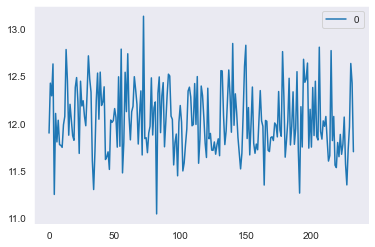

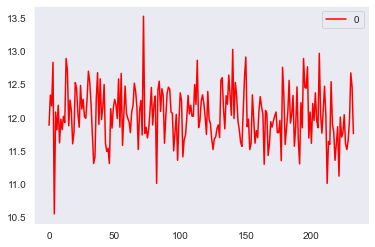

In [49]:
(pd.DataFrame(pred_rfr)).plot(kind='line')
pd.DataFrame(y_test.to_numpy()).plot(kind='line',color='red')

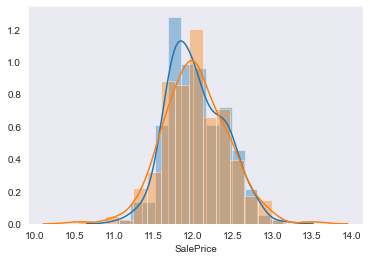

In [50]:
sns.distplot(pred_rfr)
sns.distplot(y_test)

In [51]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr))
print(cross_val_score(svr,x,y,cv=5,scoring='r2').mean())
print(mean_squared_error(y_test,pred_svr))
print(mean_squared_error(y_test,pred_svr,squared=False))

0.8065346715042797
0.8263326355744374
0.03155803092482667
0.17764580187785656


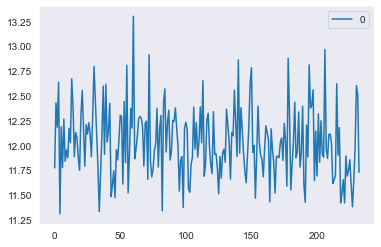

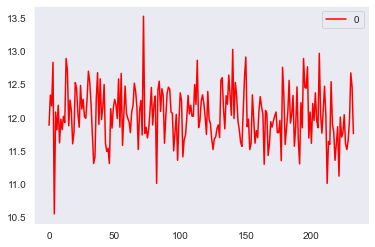

In [52]:
(pd.DataFrame(pred_svr)).plot(kind='line')
pd.DataFrame(y_test.to_numpy()).plot(kind='line',color='red')

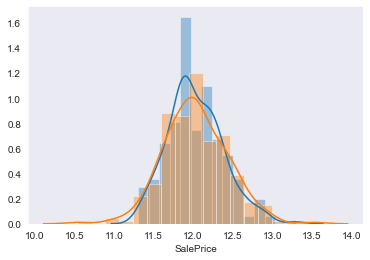

In [53]:
sns.distplot(pred_svr)
sns.distplot(y_test)

In [55]:
from sklearn.model_selection import GridSearchCV
model=RandomForestRegressor()
parameters={'n_estimators':[50,100,150,200],'criterion':('mse','mae')}
clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'n_estimators': [50, 100, 150, 200]})

In [56]:
print(clf.best_score_)
print(clf.best_estimator_.criterion)
print(clf.best_params_)

0.8533761604455474
mse
{'criterion': 'mse', 'n_estimators': 150}


In [57]:
rfr=RandomForestRegressor(criterion='mse',n_estimators=100)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print(r2_score(y_test,pred_rfr))
print(mean_squared_error(y_test,pred_rfr))
print(mean_squared_error(y_test,pred_rfr,squared=False))
print(cross_val_score(rfr,x,y,cv=5,scoring='r2').mean())

0.8395806436979136
0.026167577655827983
0.1617639566029095
0.8553526986276199


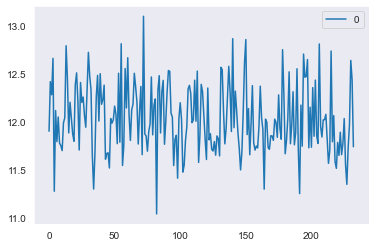

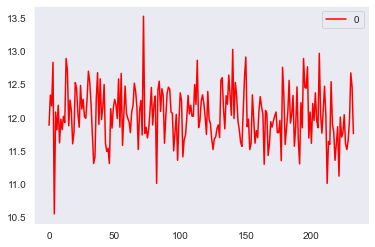

In [58]:
(pd.DataFrame(pred_rfr)).plot(kind='line')
pd.DataFrame(y_test.to_numpy()).plot(kind='line',color='red')

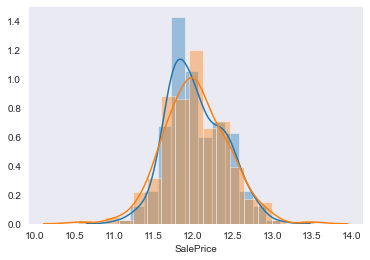

In [59]:
sns.distplot(pred_rfr)
sns.distplot(y_test)

In [60]:
from sklearn.svm import SVR
svr=SVR()
parameters={'C':[1,5,10,15,20],'kernel':('linear','poly','rbf')}
clf=GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.8735342359311001
linear
{'C': 10, 'kernel': 'linear'}


In [61]:
svr=SVR(kernel='linear',C=10)
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr))
print(mean_squared_error(y_test,pred_svr))
print(mean_squared_error(y_test,pred_svr,squared=False))
print(cross_val_score(svr,x,y,cv=5,scoring='r2').mean())

0.8157860118065687
0.030048953894715867
0.17334634087489664
0.860791856591625


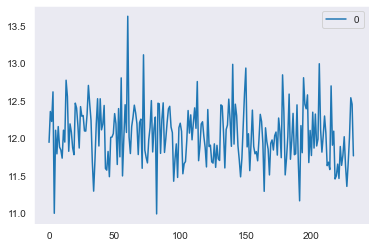

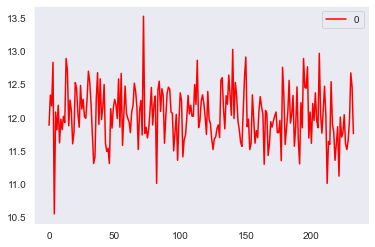

In [62]:
(pd.DataFrame(pred_svr)).plot(kind='line')
pd.DataFrame(y_test.to_numpy()).plot(kind='line',color='red')

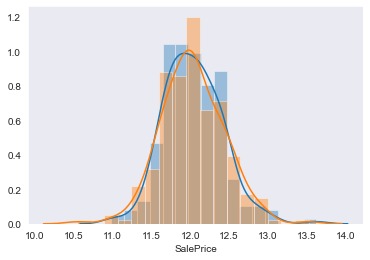

In [63]:
sns.distplot(pred_svr)
sns.distplot(y_test)

In [64]:
x1=transform_train.loc[:, transform_train.columns != 'SalePrice']
y1=transform_train['SalePrice']
r2_scr = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .20,random_state=i)
    lr.fit(x1_train,y1_train)
    pred_lr = lr.predict(x1_test)
    x=r2_score(y1_test,pred_lr)
    if x>r2_scr:
        r2_scr = x
        random_state=i

In [65]:
print(r2_scr,random_state)

0.9183864032808655 86


In [66]:
x=transform_train.loc[:, transform_train.columns != 'SalePrice']
y=transform_train['SalePrice']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20,random_state=86)
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
print(r2_score(y_test,pred_lr))
print(mean_squared_error(y_test,pred_lr))
print(mean_squared_error(y_test,pred_lr,squared=False))
print(cross_val_score(svr,x,y,cv=5,scoring='r2').mean())

0.9183864032808655
0.012601730027987966
0.11225742749585867
0.860791856591625


In [67]:
import joblib
(pd.DataFrame(lr.predict(transform_test))).to_csv('predictions_lr')
joblib.dump(lr,'lr_prices.pkl')

['lr_prices.pkl']

In [68]:
(pd.DataFrame(svr.predict(transform_test))).to_csv('predictions_svr')
joblib.dump(svr,'svr_prices.pkl')

['svr_prices.pkl']